### Simulating simple DAGs to showcase PC and Cluster-PC difference

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
import numpy as np
from scipy import linalg
from causallearn.search.ConstraintBased.PC import pc
from causallearn.graph.GeneralGraph import GeneralGraph

from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC as ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
2023-10-05 12:36:03,111 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:41] - INFO: cffi mode is CFFI_MODE.ANY
2023-10-05 12:36:03,111 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:218] - INFO: R home found: C:\Program Files\R\R-4.3.1
2023-10-05 12:36:03,142 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\rinterface_lib\embedded.py[line:20] - INFO: Default options to initialize R: rpy2, --quiet, --no-save


### 2 nodes

2023-10-05 12:36:04,174 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


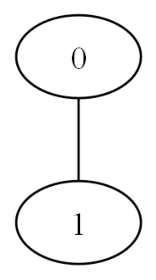

In [2]:
%autoreload 2
node_names = ['0', '1']
simulation = Simulator(n_nodes = 2, n_edges = 1, n_clusters = 1, seed = 122663, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()
# cluster_dag.cluster_graph.draw_pydot_graph()
cluster_dag.cdag_to_mpdag()
cluster_dag.cg.draw_pydot_graph()

Depth=0, working on node 1: 100%|██████████| 2/2 [00:00<00:00, 1614.44it/s]


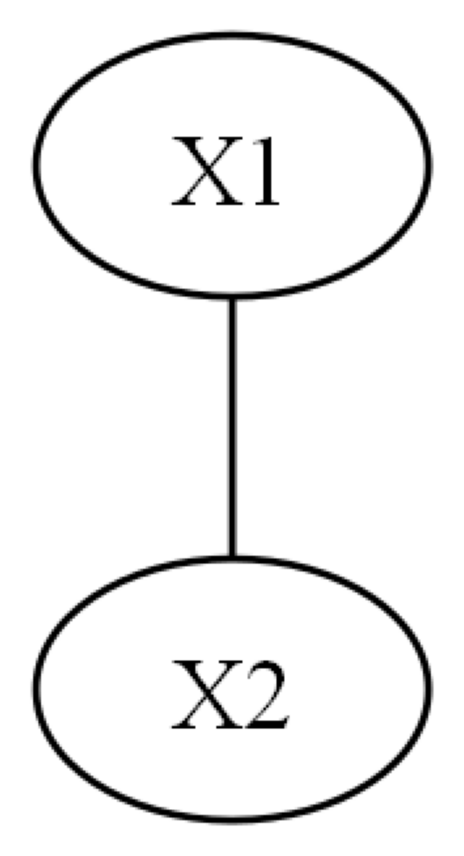

In [3]:
alpha = 0.05
base_pc = pc(cluster_dag.data, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C1 phase, Depth=0, working on node 1: 100%|██████████| 2/2 [00:00<00:00, 400.22it/s, duration: 0.00sec]


Duration of algorithm was 0.01sec


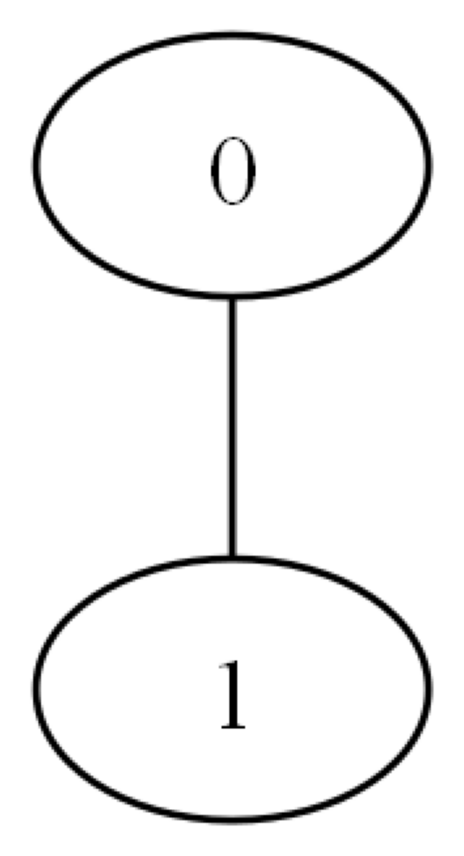

In [4]:
cluster_pc = ClusterPC(data = cluster_dag.data, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

2 nodes 2 clusters

2023-10-05 12:36:06,042 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


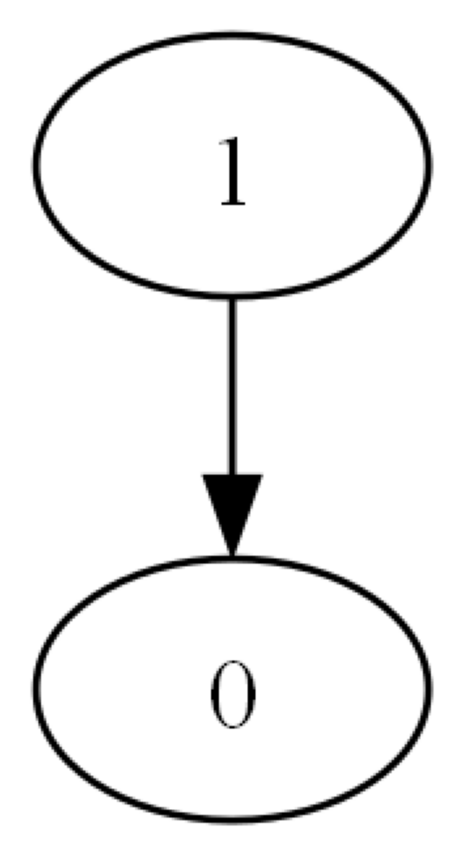

In [5]:
%autoreload 2
node_names = ['0', '1']
simulation = Simulator(n_nodes = 2, n_edges = 1, n_clusters = 2, seed = 122663, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()
# cluster_dag.cluster_graph.draw_pydot_graph()
cluster_dag.cdag_to_mpdag()
cluster_dag.cg.draw_pydot_graph()

Depth=0, working on node 1: 100%|██████████| 2/2 [00:00<00:00, 4328.49it/s]


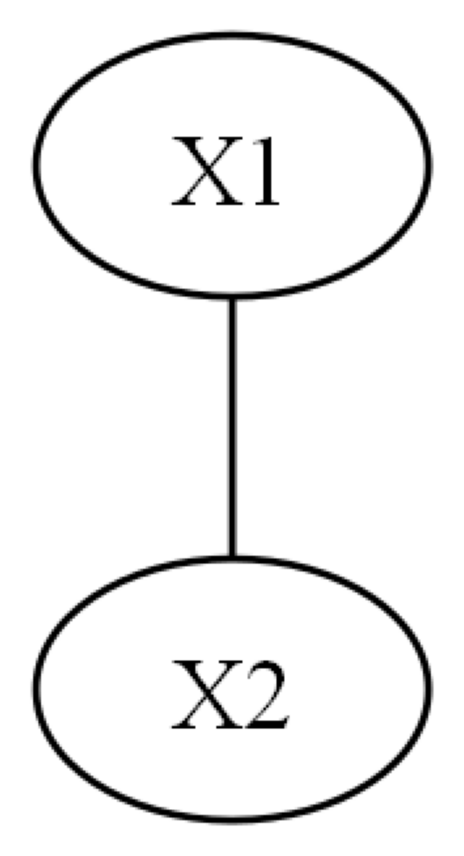

In [6]:
alpha = 0.05
base_pc = pc(cluster_dag.data, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=0, working on node 0: 100%|██████████| 1/1 [00:00<?, ?it/s, duration: 0.00sec]


Duration of algorithm was 0.02sec


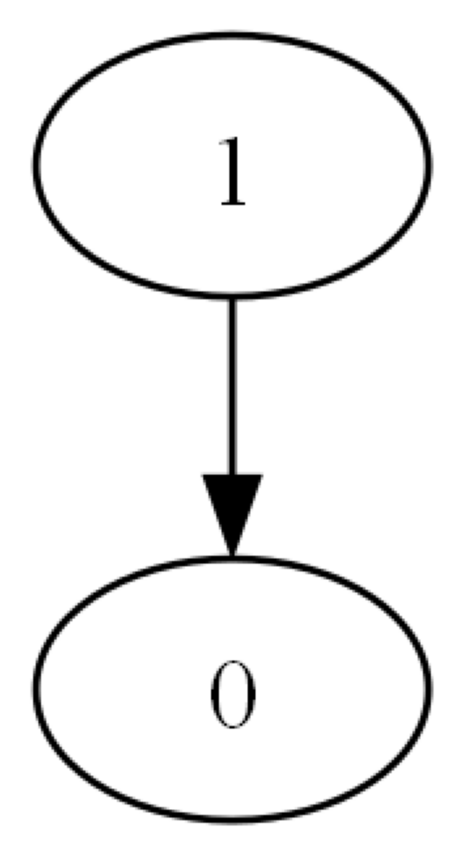

In [7]:
cluster_pc = ClusterPC(data = cluster_dag.data, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

### 3 nodes

2023-10-05 12:36:07,873 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


{'C1': ['2'], 'C2': ['0', '1']}


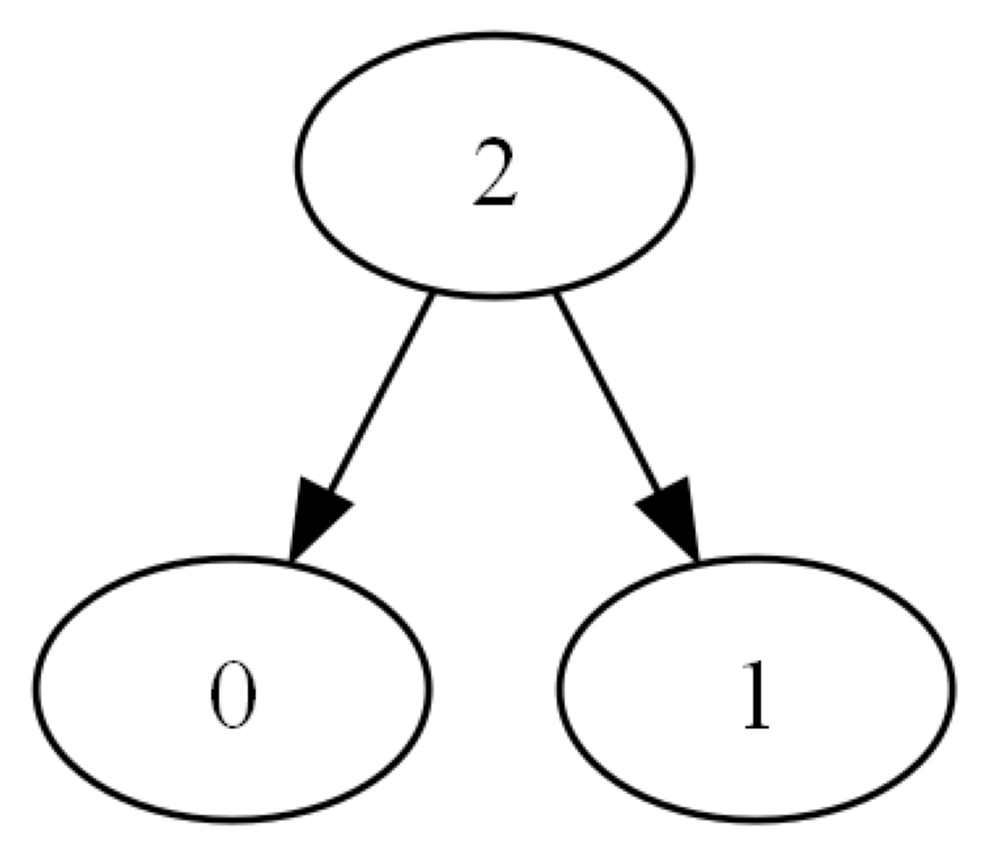

In [8]:
%autoreload 2
node_names = ['0', '1', '2']
simulation = Simulator(n_nodes = 3, n_edges = 2, n_clusters = 2, seed = 7, sample_size = 10000, node_names=node_names, \
                       weight_range= (-1,2), distribution_type= 'gauss', scm_method = 'linear')
cluster_dag = simulation.run()
# cluster_dag.cluster_graph.draw_pydot_graph()
# cluster_dag.cdag_to_mpdag()
# cluster_dag.cg.draw_pydot_graph()
print(cluster_dag.cluster_mapping)
cluster_dag.true_dag.draw_pydot_graph()

In [9]:
d = 3
sample_size = 10000
W = np.diag(np.ones(d-1), 1)
X = np.random.randn(sample_size, d).dot(linalg.inv(np.eye(d) - W))

Depth=1, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 1119.08it/s]


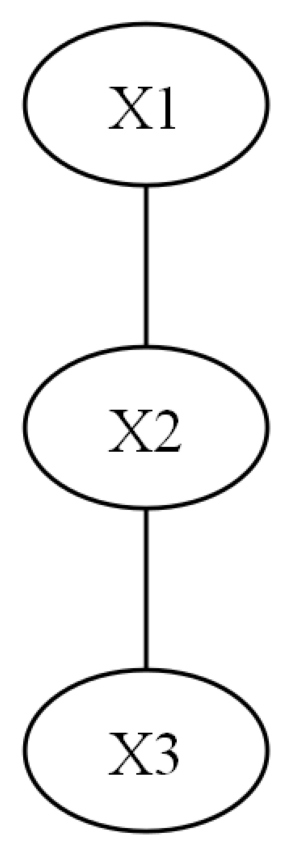

In [10]:
base_pc = pc(X, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C1 phase, Depth=1, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 178.69it/s, duration: 0.02sec]

Duration of algorithm was 0.02sec


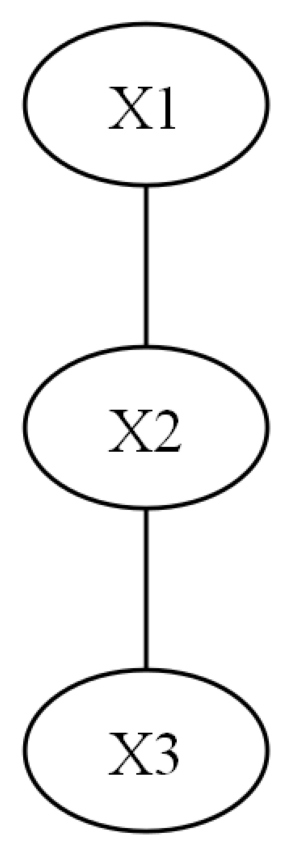

In [11]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2', 'X3']}, cluster_edges = [])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

C2 phase, Depth=1, working on node 2: 100%|██████████| 1/1 [00:00<00:00, 250.05it/s, duration: 0.01sec]

Duration of algorithm was 0.02sec


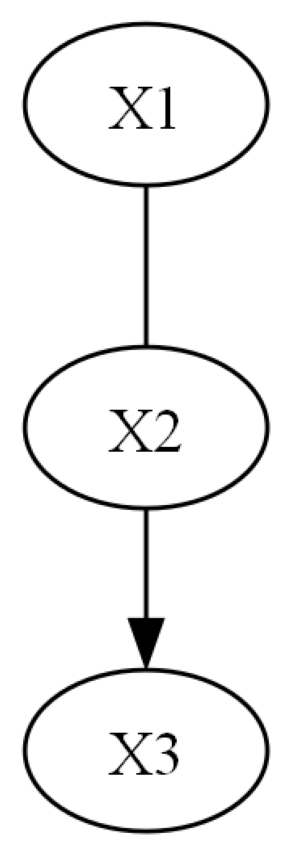

In [12]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2': ['X3']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

Able to infer extra edge orientation rule

C2 phase, Depth=1, working on node 2: 100%|██████████| 2/2 [00:00<00:00, 254.01it/s, duration: 0.01sec]

Duration of algorithm was 0.02sec


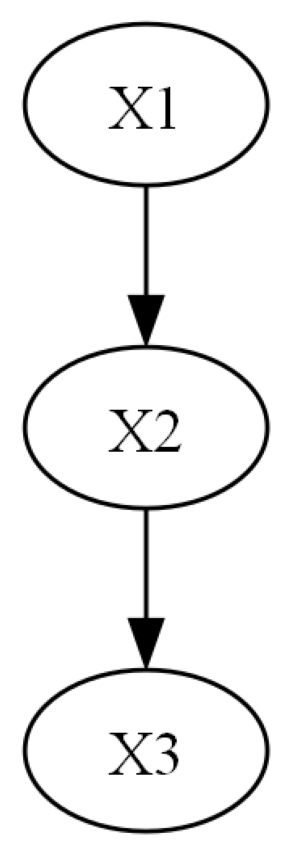

In [13]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1'], 'C2': ['X2', 'X3']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

Graph with collider

In [14]:
d = 3
sample_size = 10000
W = np.zeros((d,d))
W[0,2] = 1
W[1,2] = 1
X = np.random.randn(sample_size, d).dot(linalg.inv(np.eye(d) - W))

Depth=1, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 157.88it/s]


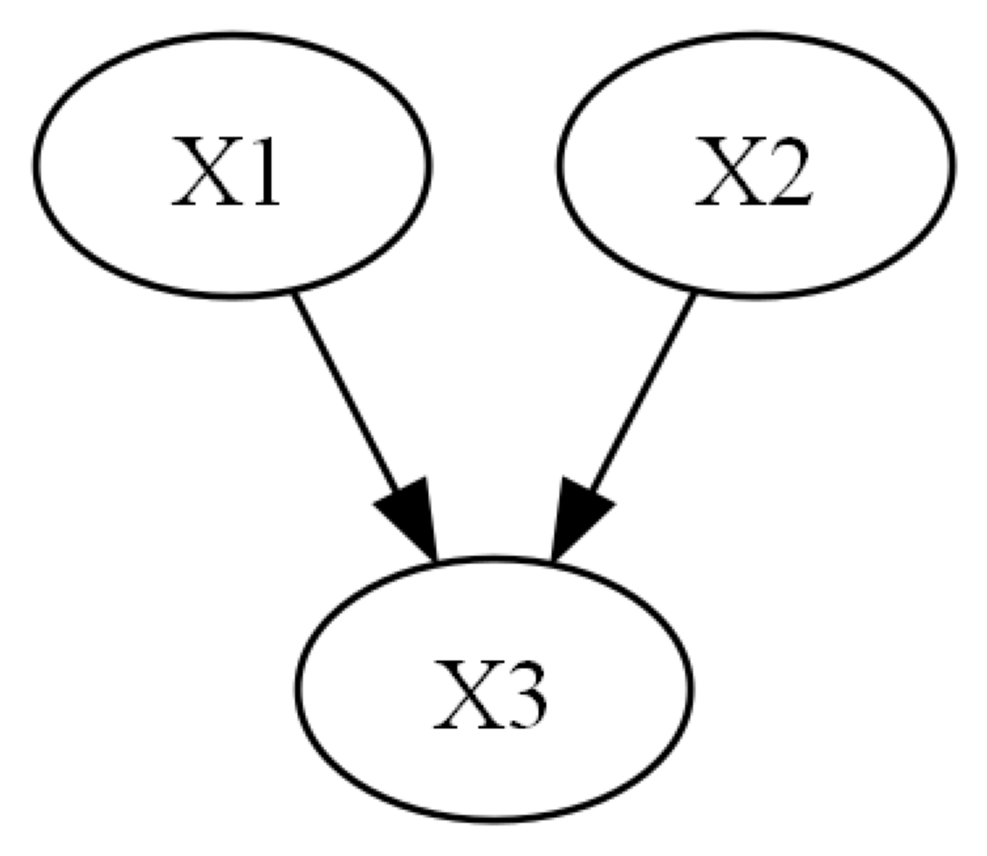

In [15]:
base_pc = pc(X, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

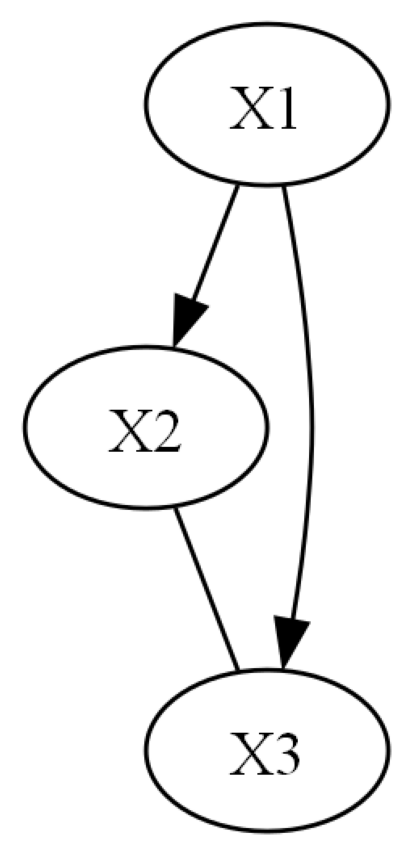

In [16]:
# Graph before fitting
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1'], 'C2': ['X2', 'X3']}, cluster_edges = [('C1', 'C2')])
cluster_dag.cdag_to_mpdag()
cluster_dag.cg.draw_pydot_graph()

C2 phase, Depth=1, working on node 2: 100%|██████████| 2/2 [00:00<?, ?it/s, duration: 0.01sec]


Duration of algorithm was 0.01sec


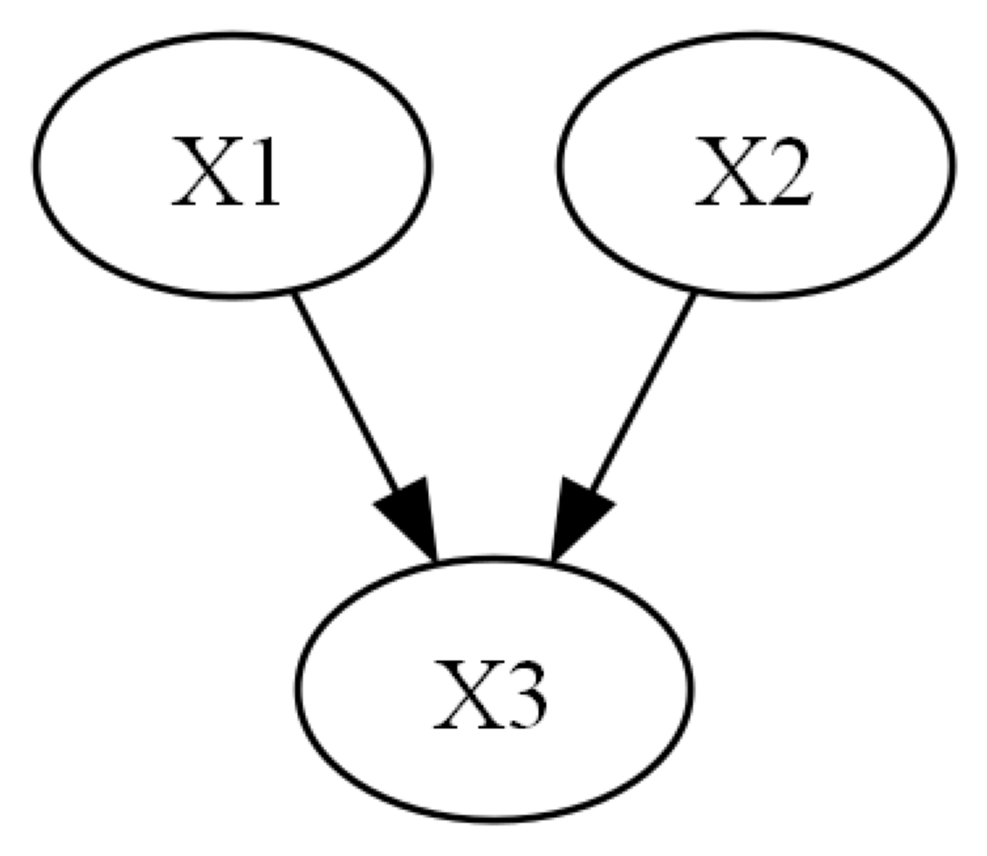

In [17]:
# Graph after fitting
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

### Graph with 5 nodes and only downward paths

In [18]:
d = 5
sample_size = 10000
W = np.diag(np.ones(d-1), 1)
X = np.random.randn(sample_size, d).dot(linalg.inv(np.eye(d) - W))

Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 298.44it/s]


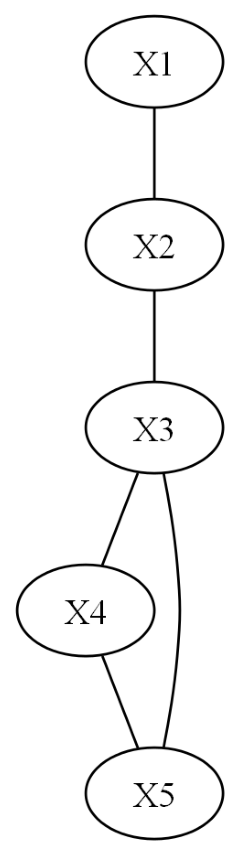

In [19]:
base_pc = pc(X, alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=2, working on node 4: 100%|██████████| 4/4 [00:00<00:00, 571.94it/s, duration: 0.04sec]


Duration of algorithm was 0.05sec


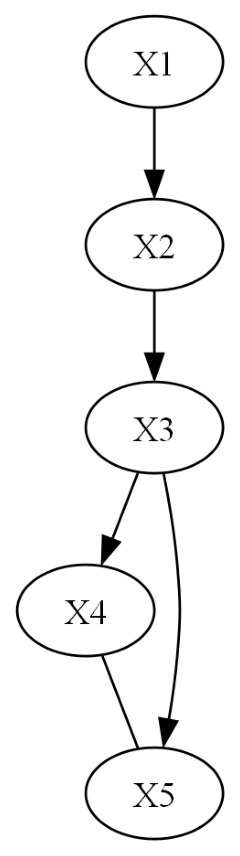

In [20]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1'], 'C2': ['X2', 'X3', 'X4', 'X5']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

### Graph with 5 nodes No.1

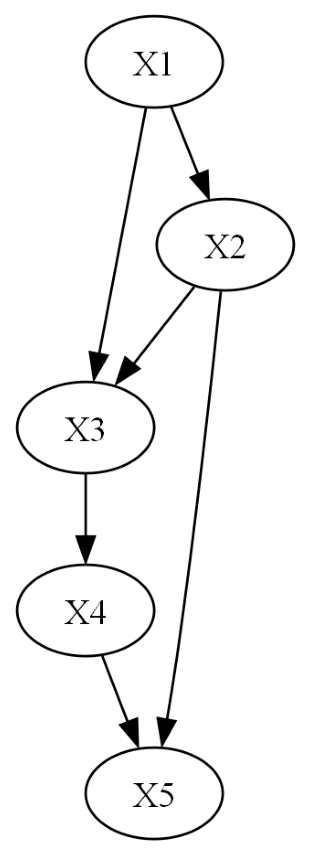

In [21]:
# List of node names
node_names = ["X1", "X2", "X3", "X4", "X5"]

# Parent dictionary
parent_dict = {
    "X1": [],               # X1 has no parents
    "X2": ["X1"],           # X2 has X1 as a parent
    "X3": ["X1", "X2"],     # X3 has both X1 and X2 as parents
    "X4": ["X3"],           # X4 has X3 as a parent
    "X5": ["X2", "X4"],     # X5 has both X2 and X4 as parents
}

# Call the make_graph function from Utils
truth, W = make_graph(node_names, parent_dict)

truth.draw_pydot_graph()

In [22]:
X = gaussian_data(W, 10000)
alpha = 0.05

Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<?, ?it/s]         


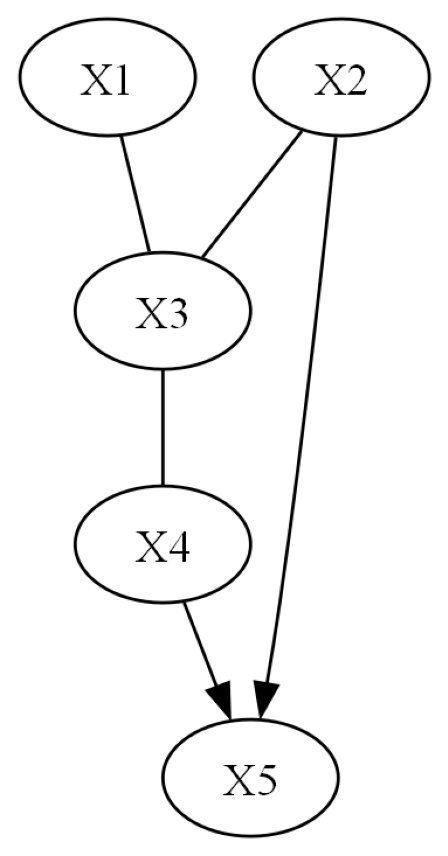

In [23]:
base_pc = pc(X, alpha = alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=2, working on node 4: 100%|██████████| 3/3 [00:00<00:00, 2920.82it/s, duration: 0.03sec]


Duration of algorithm was 0.05sec


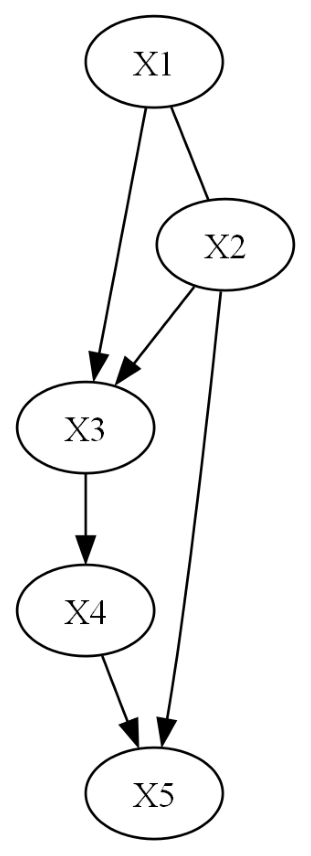

In [24]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2': ['X3', 'X4', 'X5']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

In [25]:
evaluation_cluster = Evaluator(truth = truth.G, est = cluster_pc.cdag.cg.G)
cluster_adjacency_confusion, cluster_arrow_confusion, cluster_shd, cluster_sid = evaluation_cluster.get_causallearn_metrics(sid = False)
evaluation_base = Evaluator(truth = truth.G, est = base_pc.G)
evaluation_empty = Evaluator(truth = truth.G, est = GeneralGraph(truth.G.nodes))
base_adjacency_confusion, base_arrow_confusion, base_shd, base_sid = evaluation_base.get_causallearn_metrics(sid = False)
empty_sid = evaluation_empty.get_shd()

In [26]:
print("Cluster PC SHD: ", cluster_shd)
print("Base PC SHD: ", base_shd)
print("Empty SHD: ", empty_sid)

Cluster PC SHD:  0
Base PC SHD:  1
Empty SHD:  6


### Graph with 5 nodes No.2

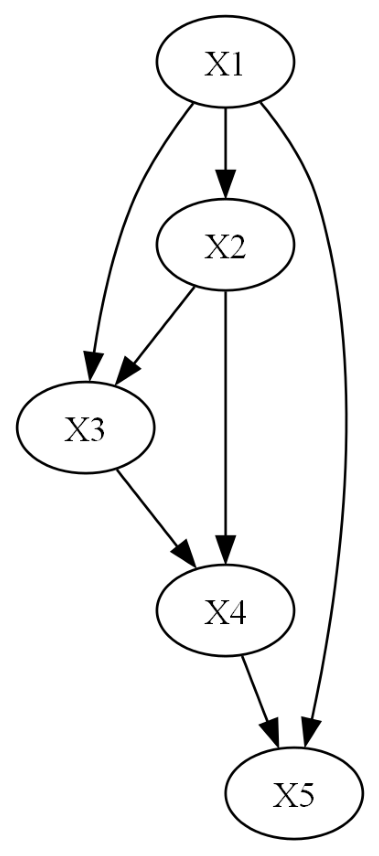

In [27]:
# List of node names
node_names = ["X1", "X2", "X3", "X4", "X5"]

# Parent dictionary
parent_dict = {
    "X1": [],               # X1 has no parents
    "X2": ["X1"],           # X2 has X1 as a parent
    "X3": ["X1", "X2"],     # X3 has both X1 and X2 as parents
    "X4": ["X2", "X3"],           # X4 has X3 as a parent
    "X5": ["X1", "X4"],     # X5 has both X2 and X4 as parents
}

# Call the make_graph function from Utils
truth, W = make_graph(node_names, parent_dict)

truth.draw_pydot_graph()

In [28]:
X = gaussian_data(W, 10000, seed = 42)
alpha = 0.05

Depth=2, working on node 4: 100%|██████████| 5/5 [00:00<00:00, 500.30it/s] 


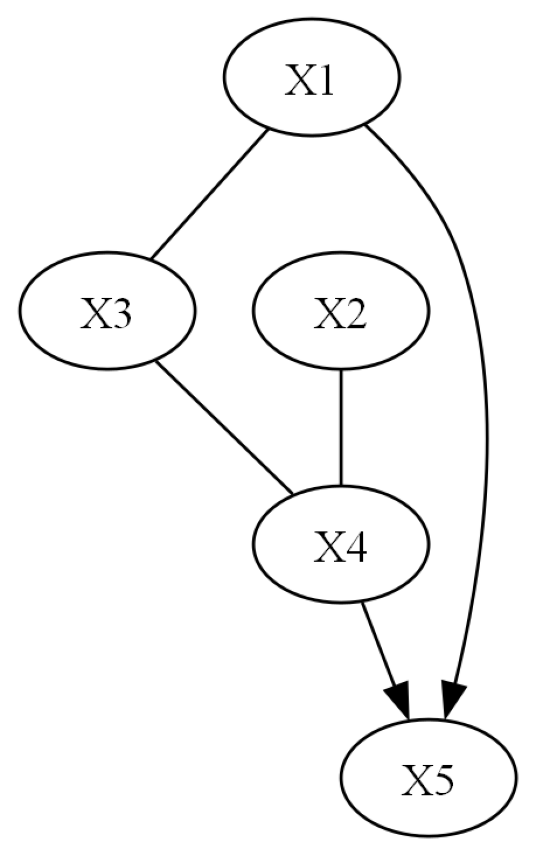

In [29]:
base_pc = pc(X, alpha = alpha, verbose = False, show_progress = True)
base_pc.draw_pydot_graph()

C2 phase, Depth=2, working on node 4: 100%|██████████| 3/3 [00:00<00:00, 1213.86it/s, duration: 0.03sec]


Duration of algorithm was 0.03sec


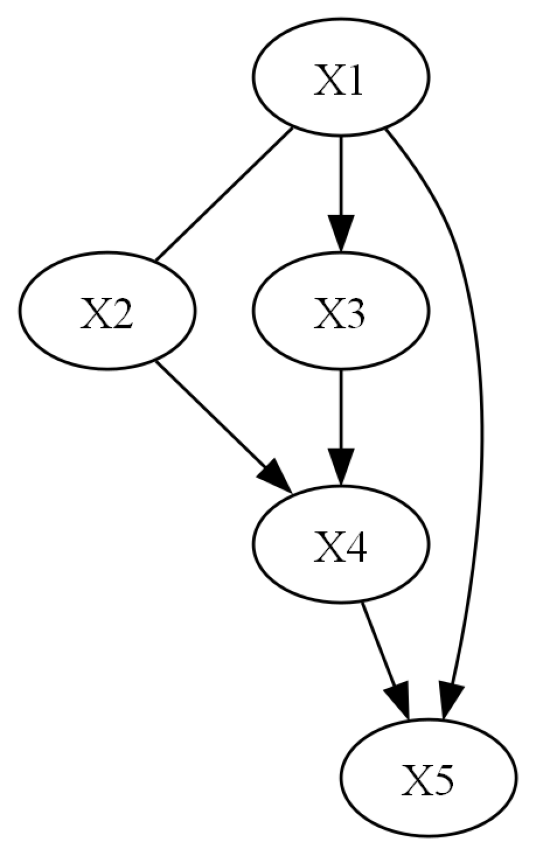

In [30]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2': ['X3', 'X4', 'X5']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()
cluster_pc.cdag.cg.draw_pydot_graph()

In [31]:
from causallearn.graph.GeneralGraph import GeneralGraph
evaluation_cluster = Evaluator(truth = truth.G, est = cluster_pc.cdag.cg.G)
cluster_adjacency_confusion, cluster_arrow_confusion, cluster_shd, cluster_sid = evaluation_cluster.get_causallearn_metrics(sid = False)
evaluation_base = Evaluator(truth = truth.G, est = base_pc.G)
evaluation_empty = Evaluator(truth = truth.G, est = GeneralGraph(truth.G.nodes))
base_adjacency_confusion, base_arrow_confusion, base_shd, base_sid = evaluation_base.get_causallearn_metrics(sid = False)
empty_sid = evaluation_empty.get_shd()

In [32]:
print("Cluster PC SHD: ", cluster_shd)
print("Base PC SHD: ", base_shd)
print("Empty SHD: ", empty_sid)

Cluster PC SHD:  1
Base PC SHD:  2
Empty SHD:  7


### Graph with 7 nodes No.1

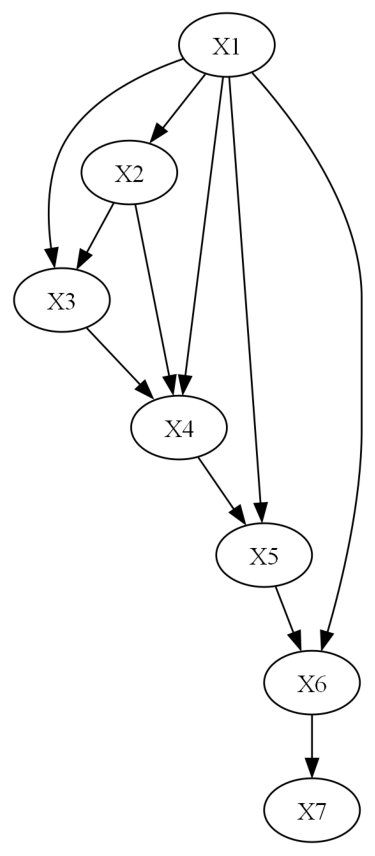

In [33]:
# List of node names
node_names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7"]

# Parent dictionary
parent_dict = {
    "X1": [],               # X1 has no parents
    "X2": ["X1"],           # X2 has X1 as a parent
    "X3": ["X1", "X2"],     # X3 has both X1 and X2 as parents
    "X4": ["X1", "X2", "X3"],           # X4 has X3 as a parent
    "X5": ["X1", "X4"],     # X5 has both X2 and X4 as parents
    "X6": ["X1", "X5"],
    "X7": ["X6"]
}

# Call the make_graph function from Utils
truth, W = make_graph(node_names, parent_dict)

truth.draw_pydot_graph()

In [34]:
X = gaussian_data(W, 10000)
alpha = 0.05

In [35]:
base_pc = pc(X, alpha = alpha, verbose = False, show_progress = True)

Depth=2, working on node 6: 100%|██████████| 7/7 [00:00<00:00, 449.63it/s]


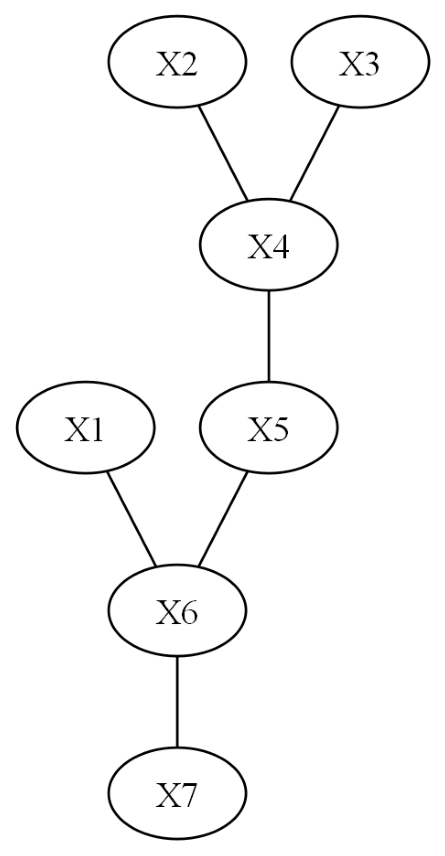

In [36]:
base_pc.draw_pydot_graph()

In [37]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2', 'X3'], 'C2': [ 'X4', 'X5', 'X6', 'X7']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()

C2 phase, Depth=2, working on node 6: 100%|██████████| 4/4 [00:00<00:00, 132.67it/s, duration: 0.06sec]

Duration of algorithm was 0.08sec


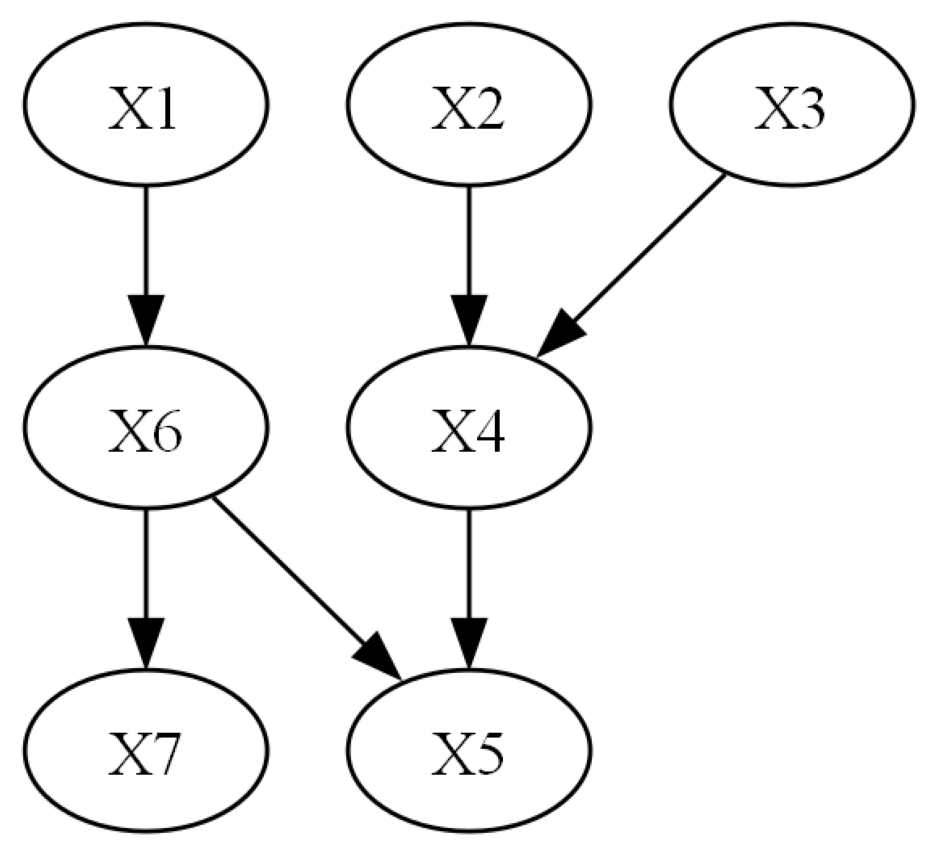

In [38]:
cluster_pc.cdag.cg.draw_pydot_graph()

In [39]:
evaluation_cluster = Evaluator(truth = truth.G, est = cluster_pc.cdag.cg.G)
cluster_adjacency_confusion, cluster_arrow_confusion, cluster_shd, cluster_sid = evaluation_cluster.get_causallearn_metrics(sid = False)
evaluation_base = Evaluator(truth = truth.G, est = base_pc.G)
evaluation_empty = Evaluator(truth = truth.G, est = GeneralGraph(truth.G.nodes))
base_adjacency_confusion, base_arrow_confusion, base_shd, base_sid = evaluation_base.get_causallearn_metrics(sid = False)
empty_sid = evaluation_empty.get_shd()

invalid value encountered in double_scalars
invalid value encountered in double_scalars


In [40]:
print("Cluster PC SHD: ", cluster_shd)
print("Base PC SHD: ", base_shd)
print("Empty SHD: ", empty_sid)

Cluster PC SHD:  6
Base PC SHD:  5
Empty SHD:  11


In [41]:
print("Cluster adjacency confusion", cluster_adjacency_confusion)
print("Cluster arrow confusion", cluster_arrow_confusion)
print("Base adjacency confusion", base_adjacency_confusion)

Cluster adjacency confusion {'true_positive': 6, 'false_positive': 0, 'false_negative': 5, 'true_negative': 10, 'precision': 1.0, 'recall': 0.5454545454545454, 'f1_score': 0.7058823529411764}
Cluster arrow confusion {'true_positive': 5.0, 'false_positive': 1.0, 'false_negative': 6.0, 'true_negative': 37.0, 'precision': 0.8333333333333334, 'recall': 0.45454545454545453, 'f1_score': 0.5882352941176471, 'true_positive_ce': 5.0, 'false_positive_ce': 1.0, 'false_negative_ce': 1.0, 'true_negative_ce': 42.0, 'precision_ce': 0.8333333333333334, 'recall_ce': 0.8333333333333334, 'f1_score_ce': 0.8333333333333334}
Base adjacency confusion {'true_positive': 6, 'false_positive': 0, 'false_negative': 5, 'true_negative': 10, 'precision': 1.0, 'recall': 0.5454545454545454, 'f1_score': 0.7058823529411764}


In [42]:
results = pd.DataFrame()
results = pd.concat([results, pd.DataFrame([cluster_adjacency_confusion]), pd.DataFrame([base_adjacency_confusion])], axis = 0)
results = pd.concat([results, pd.DataFrame([cluster_arrow_confusion]), pd.DataFrame([base_arrow_confusion])], axis = 0)
results['type'] = ['cluster_adjacency_confusion', 'base_adjacency_confusion', 'cluster_arrow_confusion', 'base_arrow_confusion']
columns_to_move_to_front = ['type']
results = results[columns_to_move_to_front + [col for col in results.columns if col not in columns_to_move_to_front]]
results

,type,true_positive,false_positive,false_negative,true_negative,precision,recall,f1_score,true_positive_ce,false_positive_ce,false_negative_ce,true_negative_ce,precision_ce,recall_ce,f1_score_ce
0,cluster_adjacency_confusion,6.0,0.0,5.0,10.0,1.000000,0.545455,0.705882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,base_adjacency_confusion,6.0,0.0,5.0,10.0,1.000000,0.545455,0.705882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,cluster_arrow_confusion,5.0,1.0,6.0,37.0,0.833333,0.454545,0.588235,5.0,1.0,1.0,42.0,0.833333,0.833333,0.833333
0,base_arrow_confusion,0.0,0.0,11.0,38.0,NaN,0.000000,NaN,0.0,0.0,6.0,43.0,NaN,0.000000,NaN


### Graph with 7 nodes No.2 - clear clusters

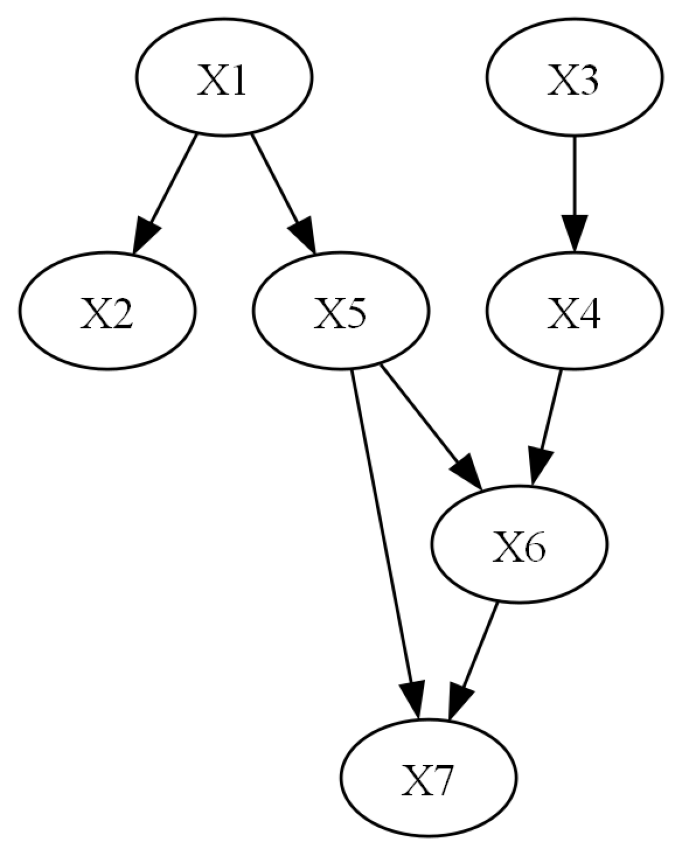

In [43]:
# List of node names
node_names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7"]

# Parent dictionary
parent_dict = {
    "X1": [],               # X1 has no parents
    "X2": ["X1"],           # X2 has X1 as a parent
    "X3": [],     
    "X4": ["X3"],           # X4 has X3 as a parent
    "X5": ["X1"],     # X5 has both X2 and X4 as parents
    "X6": ["X4", "X5"],
    "X7": ["X5", "X6"]
}

# Call the make_graph function from Utils
truth, W = make_graph(node_names, parent_dict)

truth.draw_pydot_graph()

In [44]:
X = gaussian_data(W, 10000)
alpha = 0.05

In [45]:
base_pc = pc(X, alpha = alpha, verbose = False, show_progress = True)

Depth=2, working on node 6: 100%|██████████| 7/7 [00:00<00:00, 448.01it/s] 


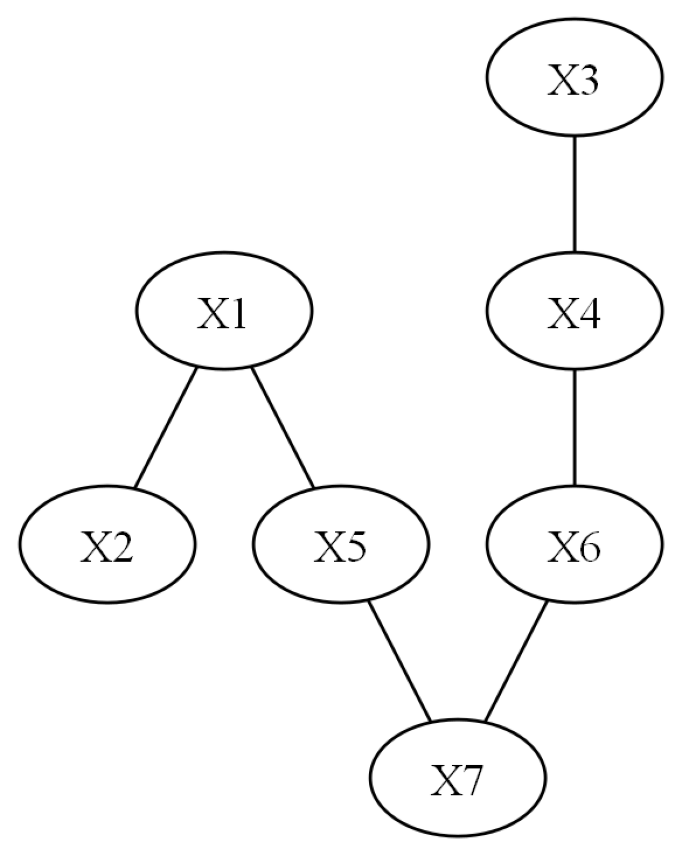

In [46]:
base_pc.draw_pydot_graph()

In [47]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2'], 'C2': [ 'X3', 'X4'], 'C3' : ['X5', 'X6', 'X7']}, cluster_edges = [('C1', 'C3'), ('C2', 'C3')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = True, show_progress = True)
cluster_pc.run()

Topological ordering ['C1', 'C2', 'C3']
Cluster node indices of C1 are [0 1]
Local graph node indices of C1 are [0 1]


C1 phase, Depth=0, working on node 1: 100%|██████████| 2/2 [00:00<?, ?it/s, duration: 0.00sec]


Depth is 0
Nonchilds of 0 are [1]
Testing edges from 0 to 1
0 dep 1 | () with p-value 0.000000
Neighbors of 1 in local graph are [0 4 5 6]
0 dep 1 | () with p-value 0.000000
Nonchilds of 1 are [0]
Testing edges from 1 to 0
1 dep 0 | () with p-value 0.000000
Neighbors of 0 in local graph are [1 4 5 6]
1 dep 0 | () with p-value 0.000000
Cluster node indices of C2 are [2 3]
Local graph node indices of C2 are [2 3]


C2 phase, Depth=0, working on node 3: 100%|██████████| 2/2 [00:00<00:00, 128.00it/s, duration: 0.02sec]


Depth is 0
Nonchilds of 2 are [3]
Testing edges from 2 to 3
2 dep 3 | () with p-value 0.000000
Neighbors of 3 in local graph are [2 4 5 6]
2 dep 3 | () with p-value 0.000000
Nonchilds of 3 are [2]
Testing edges from 3 to 2
3 dep 2 | () with p-value 0.000000
Neighbors of 2 in local graph are [3 4 5 6]
3 dep 2 | () with p-value 0.000000
Cluster node indices of C3 are [4 5 6]
Local graph node indices of C3 are [0 1 2 3 4 5 6]


C3 phase, Depth=2, working on node 6: 100%|██████████| 3/3 [00:00<00:00, 179.08it/s, duration: 0.05sec]

Depth is 0
Nonchilds of 4 are [0 1 2 3 5 6]
Testing edges from 4 to 0
4 dep 0 | () with p-value 0.000000
Testing edges from 4 to 1
4 dep 1 | () with p-value 0.000000
Testing edges from 4 to 2
4 ind 2 | () with p-value 0.362521
Testing edges from 4 to 3
4 ind 3 | () with p-value 0.534179
Testing edges from 4 to 5
4 dep 5 | () with p-value 0.000000
Neighbors of 5 in local graph are [0 1 2 3 4 6]
4 dep 5 | () with p-value 0.000000
Testing edges from 4 to 6
4 dep 6 | () with p-value 0.000000
Neighbors of 6 in local graph are [0 1 2 3 4 5]
4 dep 6 | () with p-value 0.000000
Nonchilds of 5 are [0 1 2 3 4 6]
Testing edges from 5 to 0
5 dep 0 | () with p-value 0.000000
Testing edges from 5 to 1
5 dep 1 | () with p-value 0.000000
Testing edges from 5 to 2
5 dep 2 | () with p-value 0.000000
Testing edges from 5 to 3
5 dep 3 | () with p-value 0.000000
Testing edges from 5 to 4
5 dep 4 | () with p-value 0.000000
Neighbors of 4 in local graph are [0 1 2 3 5 6]
5 dep 4 | () with p-value 0.000000
Tes

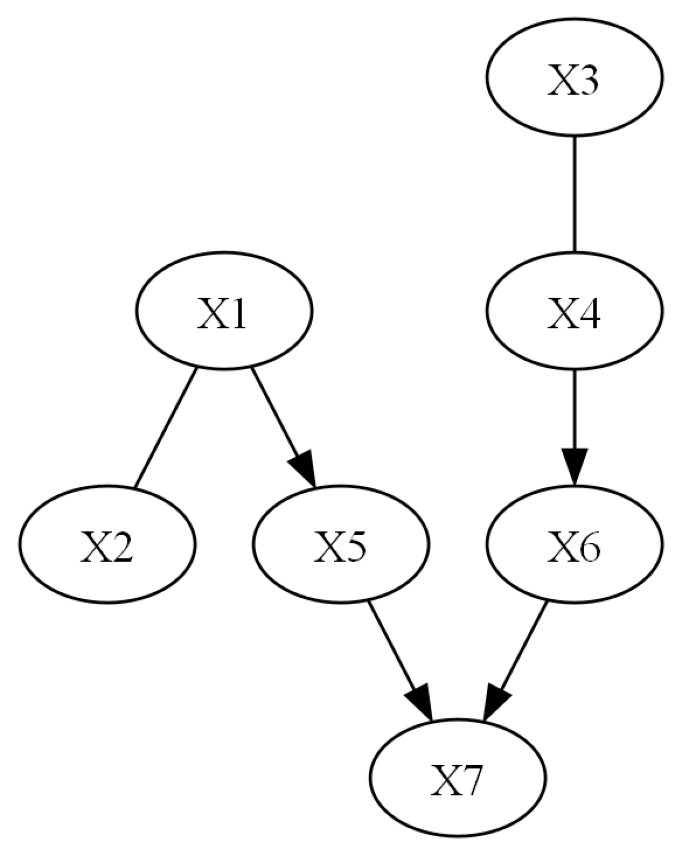

In [48]:
cluster_pc.cdag.cg.draw_pydot_graph()

In [49]:
evaluation_cluster = Evaluator(truth = truth.G, est = cluster_pc.cdag.cg.G)
cluster_adjacency_confusion, cluster_arrow_confusion, cluster_shd, cluster_sid = evaluation_cluster.get_causallearn_metrics(sid = False)
evaluation_base = Evaluator(truth = truth.G, est = base_pc.G)
evaluation_empty = Evaluator(truth = truth.G, est = GeneralGraph(truth.G.nodes))
base_adjacency_confusion, base_arrow_confusion, base_shd, base_sid = evaluation_base.get_causallearn_metrics(sid = False)
empty_sid = evaluation_empty.get_shd()

invalid value encountered in double_scalars
invalid value encountered in double_scalars


In [50]:
print("Cluster PC SHD: ", cluster_shd)
print("Base PC SHD: ", base_shd)
print("Empty SHD: ", empty_sid)

Cluster PC SHD:  1
Base PC SHD:  1
Empty SHD:  7


In [51]:
print("Cluster adjacency confusion", cluster_adjacency_confusion)
print("Cluster arrow confusion", cluster_arrow_confusion)
print("Base adjacency confusion", base_adjacency_confusion)

Cluster adjacency confusion {'true_positive': 6, 'false_positive': 0, 'false_negative': 1, 'true_negative': 14, 'precision': 1.0, 'recall': 0.8571428571428571, 'f1_score': 0.923076923076923}
Cluster arrow confusion {'true_positive': 4.0, 'false_positive': 0.0, 'false_negative': 3.0, 'true_negative': 42.0, 'precision': 1.0, 'recall': 0.5714285714285714, 'f1_score': 0.7272727272727273, 'true_positive_ce': 4.0, 'false_positive_ce': 0.0, 'false_negative_ce': 2.0, 'true_negative_ce': 43.0, 'precision_ce': 1.0, 'recall_ce': 0.6666666666666666, 'f1_score_ce': 0.8}
Base adjacency confusion {'true_positive': 6, 'false_positive': 0, 'false_negative': 1, 'true_negative': 14, 'precision': 1.0, 'recall': 0.8571428571428571, 'f1_score': 0.923076923076923}


In [52]:
results = pd.DataFrame()
results = pd.concat([results, pd.DataFrame([cluster_adjacency_confusion]), pd.DataFrame([base_adjacency_confusion])], axis = 0)
results = pd.concat([results, pd.DataFrame([cluster_arrow_confusion]), pd.DataFrame([base_arrow_confusion])], axis = 0)
results['type'] = ['cluster_adjacency_confusion', 'base_adjacency_confusion', 'cluster_arrow_confusion', 'base_arrow_confusion']
columns_to_move_to_front = ['type']
results = results[columns_to_move_to_front + [col for col in results.columns if col not in columns_to_move_to_front]]
results

,type,true_positive,false_positive,false_negative,true_negative,precision,recall,f1_score,true_positive_ce,false_positive_ce,false_negative_ce,true_negative_ce,precision_ce,recall_ce,f1_score_ce
0,cluster_adjacency_confusion,6.0,0.0,1.0,14.0,1.0,0.857143,0.923077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,base_adjacency_confusion,6.0,0.0,1.0,14.0,1.0,0.857143,0.923077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,cluster_arrow_confusion,4.0,0.0,3.0,42.0,1.0,0.571429,0.727273,4.0,0.0,2.0,43.0,1.0,0.666667,0.8
0,base_arrow_confusion,0.0,0.0,7.0,42.0,NaN,0.000000,NaN,0.0,0.0,6.0,43.0,NaN,0.000000,NaN


### Graph with 8 nodes, dense clusters, sparse in between

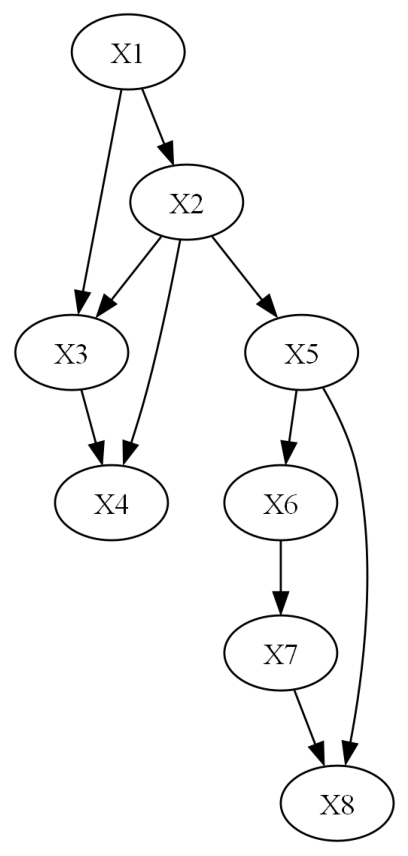

In [53]:
# List of node names
node_names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]

# Parent dictionary
parent_dict = {
    "X1": [],               # X1 has no parents
    "X2": ["X1"],           # X2 has X1 as a parent
    "X3": ["X1", "X2"],     
    "X4": ["X2", "X3"],           # X4 has X3 as a parent
    "X5": ["X2"],     # X5 has both X2 and X4 as parents
    "X6": ["X5"],
    "X7": ["X6"],
    "X8": ["X5", "X7"]
}

# Call the make_graph function from Utils
truth, W = make_graph(node_names, parent_dict)

truth.draw_pydot_graph()

In [54]:
X = gaussian_data(W, 10000)
alpha = 0.05

In [55]:
base_pc = pc(X, alpha = alpha, verbose = False, show_progress = True)

Depth=2, working on node 7: 100%|██████████| 8/8 [00:00<00:00, 667.11it/s] 


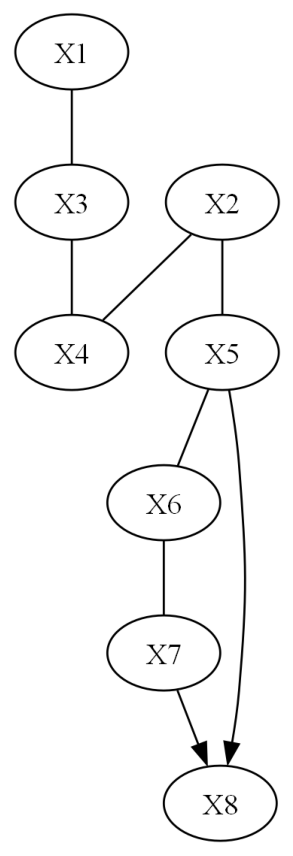

In [56]:
base_pc.draw_pydot_graph()

In [57]:
cluster_dag = ClusterDAG(cluster_mapping = {'C1' : ['X1', 'X2', 'X3', 'X4'], 'C2' : ['X5', 'X6', 'X7', 'X8']}, cluster_edges = [('C1', 'C2')])
cluster_pc = ClusterPC(data = X, cdag = cluster_dag, alpha = alpha, verbose = False, show_progress = True)
cluster_pc.run()

C2 phase, Depth=2, working on node 7: 100%|██████████| 4/4 [00:00<?, ?it/s, duration: 0.14sec]

Duration of algorithm was 0.17sec


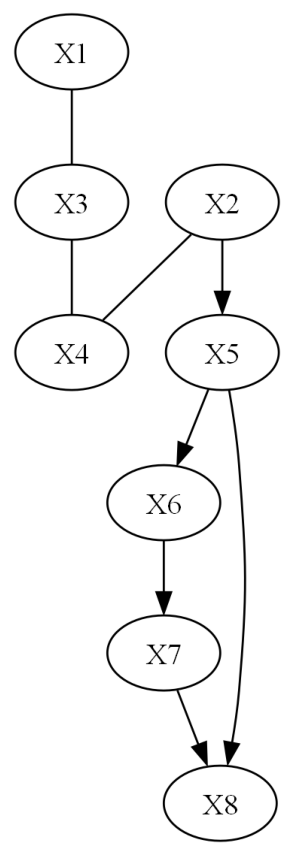

In [58]:
cluster_pc.cdag.cg.draw_pydot_graph()

In [59]:
evaluation_cluster = Evaluator(truth = truth.G, est = cluster_pc.cdag.cg.G)
cluster_adjacency_confusion, cluster_arrow_confusion, cluster_shd, cluster_sid = evaluation_cluster.get_causallearn_metrics(sid = False)
evaluation_base = Evaluator(truth = truth.G, est = base_pc.G)
evaluation_empty = Evaluator(truth = truth.G, est = GeneralGraph(truth.G.nodes))
base_adjacency_confusion, base_arrow_confusion, base_shd, base_sid = evaluation_base.get_causallearn_metrics(sid = False)
empty_sid = evaluation_empty.get_shd()

In [60]:
print("Cluster PC SHD: ", cluster_shd)
print("Base PC SHD: ", base_shd)
print("Empty SHD: ", empty_sid)

Cluster PC SHD:  2
Base PC SHD:  2
Empty SHD:  10


In [61]:
print("Cluster adjacency confusion", cluster_adjacency_confusion)
print("Cluster arrow confusion", cluster_arrow_confusion)
print("Base adjacency confusion", base_adjacency_confusion)

Cluster adjacency confusion {'true_positive': 8, 'false_positive': 0, 'false_negative': 2, 'true_negative': 18, 'precision': 1.0, 'recall': 0.8, 'f1_score': 0.888888888888889}
Cluster arrow confusion {'true_positive': 5.0, 'false_positive': 0.0, 'false_negative': 5.0, 'true_negative': 54.0, 'precision': 1.0, 'recall': 0.5, 'f1_score': 0.6666666666666666, 'true_positive_ce': 5.0, 'false_positive_ce': 0.0, 'false_negative_ce': 3.0, 'true_negative_ce': 56.0, 'precision_ce': 1.0, 'recall_ce': 0.625, 'f1_score_ce': 0.7692307692307693}
Base adjacency confusion {'true_positive': 8, 'false_positive': 0, 'false_negative': 2, 'true_negative': 18, 'precision': 1.0, 'recall': 0.8, 'f1_score': 0.888888888888889}


In [62]:
results = pd.DataFrame()
results = pd.concat([results, pd.DataFrame([cluster_adjacency_confusion]), pd.DataFrame([base_adjacency_confusion])], axis = 0)
results = pd.concat([results, pd.DataFrame([cluster_arrow_confusion]), pd.DataFrame([base_arrow_confusion])], axis = 0)
results['type'] = ['cluster_adjacency_confusion', 'base_adjacency_confusion', 'cluster_arrow_confusion', 'base_arrow_confusion']
columns_to_move_to_front = ['type']
results = results[columns_to_move_to_front + [col for col in results.columns if col not in columns_to_move_to_front]]
results

,type,true_positive,false_positive,false_negative,true_negative,precision,recall,f1_score,true_positive_ce,false_positive_ce,false_negative_ce,true_negative_ce,precision_ce,recall_ce,f1_score_ce
0,cluster_adjacency_confusion,8.0,0.0,2.0,18.0,1.0,0.8,0.888889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,base_adjacency_confusion,8.0,0.0,2.0,18.0,1.0,0.8,0.888889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,cluster_arrow_confusion,5.0,0.0,5.0,54.0,1.0,0.5,0.666667,5.0,0.0,3.0,56.0,1.0,0.625,0.769231
0,base_arrow_confusion,2.0,0.0,8.0,54.0,1.0,0.2,0.333333,2.0,0.0,6.0,56.0,1.0,0.250,0.400000
